# We will use the book Think Stat 2 for our Statistics course. 
### This book provides a more practical approach to understand statistics (using Python use cases)
* https://greenteapress.com/wp/think-stats-2e/
* https://greenteapress.com/thinkstats2/thinkstats2.pdf

# A Statistical Approach to Data Analytics

# The organization of the book follows the process we use when we start working with a dataset:

**1. Importing and cleaning:** Whatever format the data is in, it usually takes some time and effort to read the data, clean and transform it, and check that everything made it through the translation process intact.

**2. Single variable explorations:** I usually start by examining one variable at a time, finding out what the variables mean, looking at distributions of the values, and choosing appropriate summary statistics.

**3. Pair-wise explorations:** To identify possible relationships between vari-ables, We look at tables and scatter plots, and compute correlations and linear fits.

**4. Multivariate analysis:** If there are apparent relationships between vari-ables, We use multiple regression to add control variables and investigate more complex relationships.

**5. Estimation and hypothesis testing:** When reporting statistical results, it is important to answer three questions: How big is the effect? How much variability should we expect if we run the same measurement again? Is it possible that the apparent effect is due to chance?

**6. Visualization:** During exploration, visualization is an important tool for finding possible relationships and effects. Then if an apparent effect holds up to scrutiny, visualization is an effective way to communicate results.

## This Notebook tries to answer the follwing question for a couple who is having their first baby
### Question: do first babies tend to arrive late? 

# Disadvantages of anecdotal evidence
* Small number of observations: If pregnancy length is longer for first babies, the difference is probably small compared to natural variation. In that case, we might have to compare a large number of pregnancies to be sure that a difference exists.

* Selection bias: People who join a discussion of this question might be interested because their first babies were late. In that case the process of selecting data would bias the results.

* Confirmation bias: People who believe the claim might be more likely to contribute examples that confirm it. People who doubt the claim are more likely to cite counterexamples.

* Inaccuracy: Anecdotes are often personal stories, and often misremem- bered, misrepresented, repeated inaccurately, etc.

#### So, how can we do better?
#### Ans - Using Statistical Approach

**1. Data collection:** We will use data from a large national survey that was designed explicitly with the goal of generating statistically valid inferences about the U.S. population.

**2. Descriptive statistics:** We will generate statistics that summarize the data concisely, and evaluate different ways to visualize data.

**3. Exploratory data analysis:** We will look for patterns, differences, and other features that address the questions we are interested in. At the same time we will check for inconsistencies and identify limitations.

**4. Estimation:**  We will use data from a sample to estimate characteristics of the general population.

**5. Hypothesis testing:** Where we see apparent effects, like a difference between two groups, we will evaluate whether the effect might have happened by chance.

In [1]:
import pandas as pd

In [2]:
import nsfg
df = nsfg.ReadFemPreg()
df

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,6.1875
13589,12571,2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,NaN
13590,12571,3,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,NaN
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,7.5000


# Filter data frame for lesser columns

In [3]:
df = df.loc[:,['caseid','outcome','pregordr','birthord','birthwgt_lb','birthwgt_oz','agepreg','pregnum','prglngth']]

1. caseid is the integer ID of the respondent.
2. prglngth is the integer duration of the pregnancy in weeks.
3. outcome is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth.
4. pregordr is a pregnancy serial number; for example, the code for a respondent’s first pregnancy is 1, for the second pregnancy is 2, and so on.
5. birthord is a serial number for live births; the code for a respondent’s first child is 1, and so on. For outcomes other than live birth, this field is blank.
6. birthwgt_lb and birthwgt_oz contain the pounds and ounces parts of the birth weight of the baby.
7. agepreg is the mother’s age at the end of the pregnancy.
8. finalwgt is the statistical weight associated with the respondent. It is a floating-point value that indicates the number of people in the U.S. population this respondent represents.

In [4]:
df

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [5]:
df

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.outcome.value_counts()

1    9148
4    1921
2    1862
6     352
5     190
3     120
Name: outcome, dtype: int64

<AxesSubplot:>

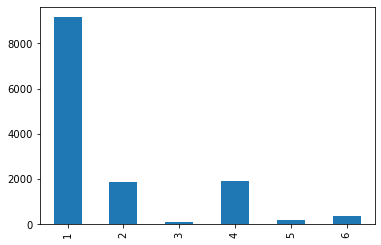

In [8]:
df.outcome.value_counts().sort_index().plot(kind = 'bar')

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.outcome

0        1
1        1
2        1
3        1
4        1
        ..
13588    1
13589    2
13590    2
13591    1
13592    1
Name: outcome, Length: 13593, dtype: int64

In [11]:
df.columns

Index(['caseid', 'outcome', 'pregordr', 'birthord', 'birthwgt_lb',
       'birthwgt_oz', 'agepreg', 'pregnum', 'prglngth'],
      dtype='object')

In [12]:
type(df.caseid)

pandas.core.series.Series

In [13]:
[True, False]

[True, False]

In [14]:
sum([True, False])

1

In [15]:
df.isna().sum()

caseid            0
outcome           0
pregordr          0
birthord       4445
birthwgt_lb    4509
birthwgt_oz    4554
agepreg         352
pregnum           0
prglngth          0
dtype: int64

In [16]:
df.shape

(13593, 9)

In [17]:
df

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


# Filtering for outcome equals to 1

In [18]:
live = df.loc[ df.outcome == 1 , : ]
live

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13581,12568,1,2,1.0,6.0,6.0,30.66,3,39
13584,12569,1,2,1.0,6.0,6.0,26.91,2,34
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [19]:
type(live.agepreg)

pandas.core.series.Series

In [20]:
live.loc[live.prglngth == 39,:]

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13579,12566,1,2,2.0,7.0,0.0,25.91,2,39
13581,12568,1,2,1.0,6.0,6.0,30.66,3,39
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [21]:
rahul = live.loc[(live.prglngth == 39) & (live.birthwgt_lb>= 6),:]
rahul

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13579,12566,1,2,2.0,7.0,0.0,25.91,2,39
13581,12568,1,2,1.0,6.0,6.0,30.66,3,39
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [22]:
rahul.birthwgt_lb.value_counts()

7.0     1705
6.0     1267
8.0      976
9.0      306
10.0      66
11.0       8
13.0       3
14.0       3
12.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

In [23]:
rahul.birthwgt_lb.value_counts(normalize = True)

7.0     0.393038
6.0     0.292070
8.0     0.224988
9.0     0.070539
10.0    0.015214
11.0    0.001844
13.0    0.000692
14.0    0.000692
12.0    0.000692
15.0    0.000231
Name: birthwgt_lb, dtype: float64

<AxesSubplot:>

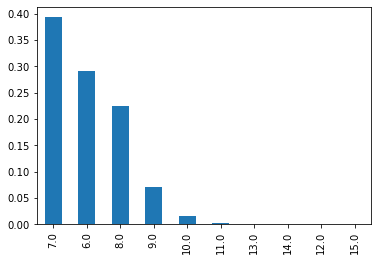

In [24]:
rahul.birthwgt_lb.value_counts(normalize = True).plot(kind = 'bar')

In [25]:
type(rahul.birthwgt_lb.value_counts().reset_index())

pandas.core.frame.DataFrame

<AxesSubplot:>

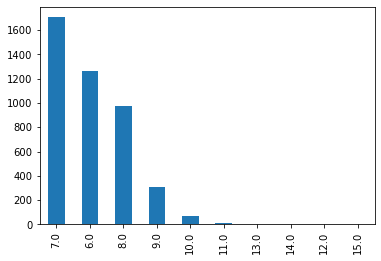

In [26]:
rahul.birthwgt_lb.value_counts().plot(kind= 'bar')

In [27]:
type(rahul.birthwgt_lb.value_counts())

pandas.core.series.Series

In [28]:
live.outcome.value_counts()

1    9148
Name: outcome, dtype: int64

In [29]:
df.describe()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
count,13593.000000,13593.000000,13593.000000,9148.000000,9084.000000,9039.000000,13241.000000,13593.000000,13593.000000
mean,6216.526595,1.763996,2.349150,1.825645,6.832122,6.917801,24.688151,3.698301,29.531229
std,3645.417341,1.315930,1.577807,1.040395,1.411447,4.602523,5.814708,2.073363,13.802523
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,10.330000,1.000000,0.000000
25%,3022.000000,1.000000,1.000000,1.000000,6.000000,3.000000,20.080000,2.000000,13.000000
50%,6161.000000,1.000000,2.000000,2.000000,7.000000,7.000000,23.910000,3.000000,39.000000
75%,9423.000000,2.000000,3.000000,2.000000,8.000000,11.000000,28.660000,5.000000,39.000000
max,12571.000000,6.000000,19.000000,10.000000,15.000000,15.000000,44.080000,19.000000,50.000000


In [30]:
live.isna().sum()

caseid           0
outcome          0
pregordr         0
birthord         0
birthwgt_lb     64
birthwgt_oz    109
agepreg          0
pregnum          0
prglngth         0
dtype: int64

In [31]:
live.describe()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
count,9148.000000,9148.0,9148.000000,9148.000000,9084.000000,9039.000000,9148.000000,9148.000000,9148.000000
mean,6176.405444,1.0,2.275251,1.825645,6.832122,6.917801,24.940751,3.477809,38.560560
std,3655.926584,0.0,1.443628,1.040395,1.411447,4.602523,5.567399,1.853568,2.702344
min,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,10.830000,1.000000,0.000000
25%,2965.750000,1.0,1.000000,1.000000,6.000000,3.000000,20.500000,2.000000,39.000000
50%,6060.000000,1.0,2.000000,2.000000,7.000000,7.000000,24.330000,3.000000,39.000000
75%,9388.250000,1.0,3.000000,2.000000,8.000000,11.000000,28.910000,4.000000,39.000000
max,12571.000000,1.0,17.000000,10.000000,15.000000,15.000000,44.080000,19.000000,50.000000


In [32]:
live.prglngth.value_counts()

39    4693
40    1116
38     607
41     587
37     455
42     328
36     321
35     311
43     148
30     138
32     115
34      60
33      49
44      46
26      35
28      32
31      27
29      21
24      13
45      10
22       7
48       7
27       3
25       3
17       2
50       2
21       2
9        1
47       1
18       1
19       1
4        1
20       1
13       1
46       1
23       1
0        1
Name: prglngth, dtype: int64

In [33]:
df.columns

Index(['caseid', 'outcome', 'pregordr', 'birthord', 'birthwgt_lb',
       'birthwgt_oz', 'agepreg', 'pregnum', 'prglngth'],
      dtype='object')

In [34]:
type(df)

pandas.core.frame.DataFrame

In [35]:
pregordr = df['pregordr']

In [36]:
type(pregordr)

pandas.core.series.Series

In [37]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
df

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [40]:
df

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [41]:
df.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [42]:
df.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

In [43]:
caseid = 10229

In [44]:
preg_map = nsfg.MakePregMap(df)

In [45]:
indices = preg_map[caseid]
indices

[11093, 11094, 11095, 11096, 11097, 11098, 11099]

In [46]:
df.outcome[indices]

11093    4
11094    4
11095    4
11096    4
11097    4
11098    4
11099    1
Name: outcome, dtype: int64

In [47]:
df.loc[indices]

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
11093,10229,4,1,NaN,NaN,NaN,19.58,7,2
11094,10229,4,2,NaN,NaN,NaN,21.75,7,3
11095,10229,4,3,NaN,NaN,NaN,23.83,7,4
11096,10229,4,4,NaN,NaN,NaN,25.50,7,2
11097,10229,4,5,NaN,NaN,NaN,29.08,7,3
11098,10229,4,6,NaN,NaN,NaN,32.16,7,13
11099,10229,1,7,1.0,7.0,11.0,33.16,7,43


In [48]:
df.loc[df.caseid ==10229,:]

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
11093,10229,4,1,NaN,NaN,NaN,19.58,7,2
11094,10229,4,2,NaN,NaN,NaN,21.75,7,3
11095,10229,4,3,NaN,NaN,NaN,23.83,7,4
11096,10229,4,4,NaN,NaN,NaN,25.50,7,2
11097,10229,4,5,NaN,NaN,NaN,29.08,7,3
11098,10229,4,6,NaN,NaN,NaN,32.16,7,13
11099,10229,1,7,1.0,7.0,11.0,33.16,7,43


In [49]:
df

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [50]:
df[df.caseid ==12571]

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39
13592,12571,1,5,3.0,7.0,8.0,21.58,5,39


In [51]:
df.pregnum

0        2
1        2
2        3
3        3
4        3
        ..
13588    5
13589    5
13590    5
13591    5
13592    5
Name: pregnum, Length: 13593, dtype: int64

#### Think about questions you find personally interesting, or items of conven- tional wisdom, or controversial topics, or questions that have political conse- quences, and see if you can formulate a question that lends itself to statistical inquiry.

#### Each of you can pick up a project that requires to pose a statistical question, find a dataset that can address it, and apply each of the techniques you learn to their own data.

# Distributions

## Histograms

In [52]:
live.head()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39


In [53]:
live.describe()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
count,9148.000000,9148.0,9148.000000,9148.000000,9084.000000,9039.000000,9148.000000,9148.000000,9148.000000
mean,6176.405444,1.0,2.275251,1.825645,6.832122,6.917801,24.940751,3.477809,38.560560
std,3655.926584,0.0,1.443628,1.040395,1.411447,4.602523,5.567399,1.853568,2.702344
min,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,10.830000,1.000000,0.000000
25%,2965.750000,1.0,1.000000,1.000000,6.000000,3.000000,20.500000,2.000000,39.000000
50%,6060.000000,1.0,2.000000,2.000000,7.000000,7.000000,24.330000,3.000000,39.000000
75%,9388.250000,1.0,3.000000,2.000000,8.000000,11.000000,28.910000,4.000000,39.000000
max,12571.000000,1.0,17.000000,10.000000,15.000000,15.000000,44.080000,19.000000,50.000000


In [54]:
import matplotlib.pyplot as plt

In [55]:
live.shape

(9148, 9)

<AxesSubplot:xlabel='prglngth', ylabel='Count'>

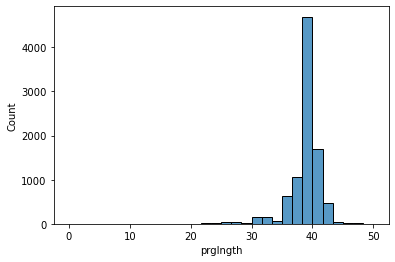

In [57]:
import seaborn as sns
sns.histplot(live.prglngth, bins =30)

In [58]:
live.describe()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
count,9148.000000,9148.0,9148.000000,9148.000000,9084.000000,9039.000000,9148.000000,9148.000000,9148.000000
mean,6176.405444,1.0,2.275251,1.825645,6.832122,6.917801,24.940751,3.477809,38.560560
std,3655.926584,0.0,1.443628,1.040395,1.411447,4.602523,5.567399,1.853568,2.702344
min,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,10.830000,1.000000,0.000000
25%,2965.750000,1.0,1.000000,1.000000,6.000000,3.000000,20.500000,2.000000,39.000000
50%,6060.000000,1.0,2.000000,2.000000,7.000000,7.000000,24.330000,3.000000,39.000000
75%,9388.250000,1.0,3.000000,2.000000,8.000000,11.000000,28.910000,4.000000,39.000000
max,12571.000000,1.0,17.000000,10.000000,15.000000,15.000000,44.080000,19.000000,50.000000


<AxesSubplot:xlabel='prglngth', ylabel='Count'>

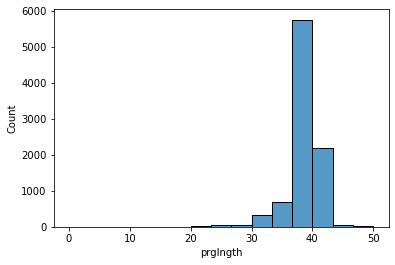

In [59]:
sns.histplot(live.prglngth)

In [60]:
live.prglngth.mean()

38.56055968517709

In [61]:
live.prglngth.value_counts().sort_index()

0        1
4        1
9        1
13       1
17       2
18       1
19       1
20       1
21       2
22       7
23       1
24      13
25       3
26      35
27       3
28      32
29      21
30     138
31      27
32     115
33      49
34      60
35     311
36     321
37     455
38     607
39    4693
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

# Outliers

The One way to handle outliers depends on “domain knowledge”; that is, information about where the data come from and what they mean. And it depends on what analysis you are planning to perform.

In [62]:
live.prglngth.value_counts().sort_index()

0        1
4        1
9        1
13       1
17       2
18       1
19       1
20       1
21       2
22       7
23       1
24      13
25       3
26      35
27       3
28      32
29      21
30     138
31      27
32     115
33      49
34      60
35     311
36     321
37     455
38     607
39    4693
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

Values below 10 weeks are certainly errors; the most likely explanation is that the outcome was not coded correctly. Values higher than 30 weeks are probably legitimate.

Most doctors recommend induced labor if a pregnancy exceeds 42 weeks, so some of the longer values are surprising. In particular, 50 weeks seems medically unlikely.

In our example, the motivating question is whether first babies tend to be early (or late). When people ask this question, they are usually interested in full-term pregnancies, so for this analysis we will focus on pregnancies longer than 27 weeks.

In [63]:
live.head()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39


In [64]:
live.loc[live.prglngth<5]

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
4108,3664,1,2,2.0,7.0,0.0,21.00,3,4
6458,5849,1,2,1.0,8.0,0.0,22.08,3,0


In [65]:
live.shape

(9148, 9)

# Filter for pregnancies longer than 27 weeks (based on domain knowledge)

In [66]:
live_wo_outliers = live.loc[live.prglngth>= 27]

<AxesSubplot:xlabel='prglngth', ylabel='Count'>

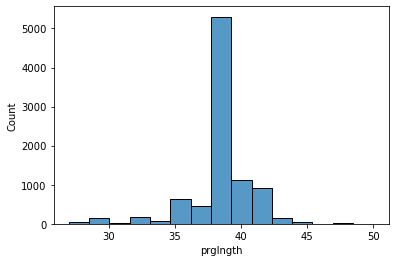

In [67]:
sns.histplot(live_wo_outliers.prglngth)

In [68]:
live_wo_outliers.shape

(9078, 9)

In [69]:
live_wo_outliers.reset_index(drop = True)

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
9073,12568,1,2,1.0,6.0,6.0,30.66,3,39
9074,12569,1,2,1.0,6.0,6.0,26.91,2,34
9075,12571,1,1,1.0,6.0,3.0,17.91,5,39
9076,12571,1,4,2.0,7.0,8.0,21.58,5,39


# Create separate dataframes for first babies vs others 

In [70]:
firsts = live_wo_outliers.loc[live_wo_outliers.birthord == 1].reset_index(drop = True)
others = live_wo_outliers.loc[live_wo_outliers.birthord != 1].reset_index(drop = True)

In [71]:
firsts.shape

(4381, 9)

In [72]:
others.shape

(4697, 9)

In [73]:
firsts

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,2,1,1,1.0,9.0,2.0,14.33,3,39
2,6,1,1,1.0,8.0,9.0,27.00,3,38
3,7,1,1,1.0,7.0,9.0,28.08,2,39
4,12,1,1,1.0,7.0,13.0,25.75,1,39
...,...,...,...,...,...,...,...,...,...
4376,12565,1,1,1.0,6.0,7.0,31.66,2,39
4377,12566,1,1,1.0,6.0,0.0,24.00,2,39
4378,12568,1,2,1.0,6.0,6.0,30.66,3,39
4379,12569,1,2,1.0,6.0,6.0,26.91,2,34


# Compare mean of the pregnancy length two data sets to see of there is any significant difference

In [74]:
firsts.prglngth.mean()

38.710340104998856

In [75]:
others.prglngth.mean()

38.64786033638492

And here's the difference (in weeks):

In [76]:
firsts.prglngth.mean() - others.prglngth.mean()

0.06247976861393312

**The difference is 0.062 weeks, which works out to 13 hours. As a fraction of the typical pregnancy length, this difference is about 0.2%.
If we assume this estimate is accurate, such a difference would have no practical consequences. In fact, without observing a large number of pregnancies, it is unlikely that anyone would notice this difference at all.**

22 APR

# Topics Covered

Under Descriptive Analytics
1. 5 point summary - min, 25%, 50%, 75%, max
2. buliding the distribution plot using 5 point summary
3. histograms
4. removing outliers - using domain knowledge
5. Answer of the Question - Comparing the mean

# Next 
6. removing outliers - using IQR
7. box plot
8. Comparing the mean again after outliers removal

In [77]:
firsts.dtypes

caseid           int64
outcome          int64
pregordr         int64
birthord       float64
birthwgt_lb    float64
birthwgt_oz    float64
agepreg        float64
pregnum          int64
prglngth         int64
dtype: object

In [78]:
firsts.head()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,2,1,1,1.0,9.0,2.0,14.33,3,39
2,6,1,1,1.0,8.0,9.0,27.00,3,38
3,7,1,1,1.0,7.0,9.0,28.08,2,39
4,12,1,1,1.0,7.0,13.0,25.75,1,39


In [79]:
firsts.shape

(4381, 9)

In [80]:
firsts.loc[ :, ['birthwgt_lb']]

,birthwgt_lb
0,8.0
1,9.0
2,8.0
3,7.0
4,7.0
...,...
4376,6.0
4377,6.0
4378,6.0
4379,6.0


<AxesSubplot:xlabel='agepreg', ylabel='Count'>

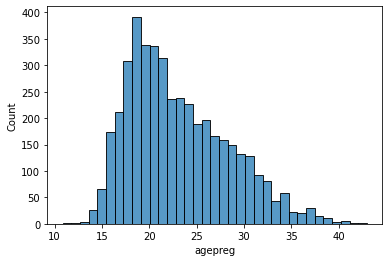

In [81]:
sns.histplot(firsts.agepreg)

In [82]:
import seaborn as sns

/Users/rahulgarg/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='agepreg'>

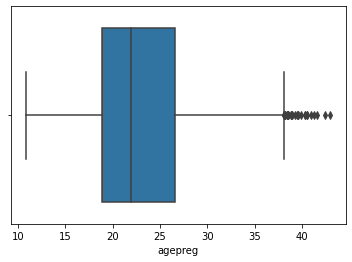

In [83]:
sns.boxplot(firsts.agepreg, whis = 1.5)

In [84]:
firsts.agepreg.describe()

count    4381.000000
mean       23.080662
std         5.283655
min        10.830000
25%        18.910000
50%        21.910000
75%        26.580000
max        43.000000
Name: agepreg, dtype: float64

In [85]:
firsts.agepreg.value_counts()

18.58    46
18.83    44
20.75    40
20.91    40
19.66    40
         ..
36.08     1
41.58     1
36.25     1
13.58     1
11.75     1
Name: agepreg, Length: 315, dtype: int64

In [86]:
iqr = 26.58-18.91
iqr

7.669999999999998

In [87]:
18.910000 - 1.5*iqr

7.405000000000003

In [88]:
26.580000 + 1.5*iqr

38.084999999999994

# Outliers Removal Using Inter Quartile Range/ Box Plot

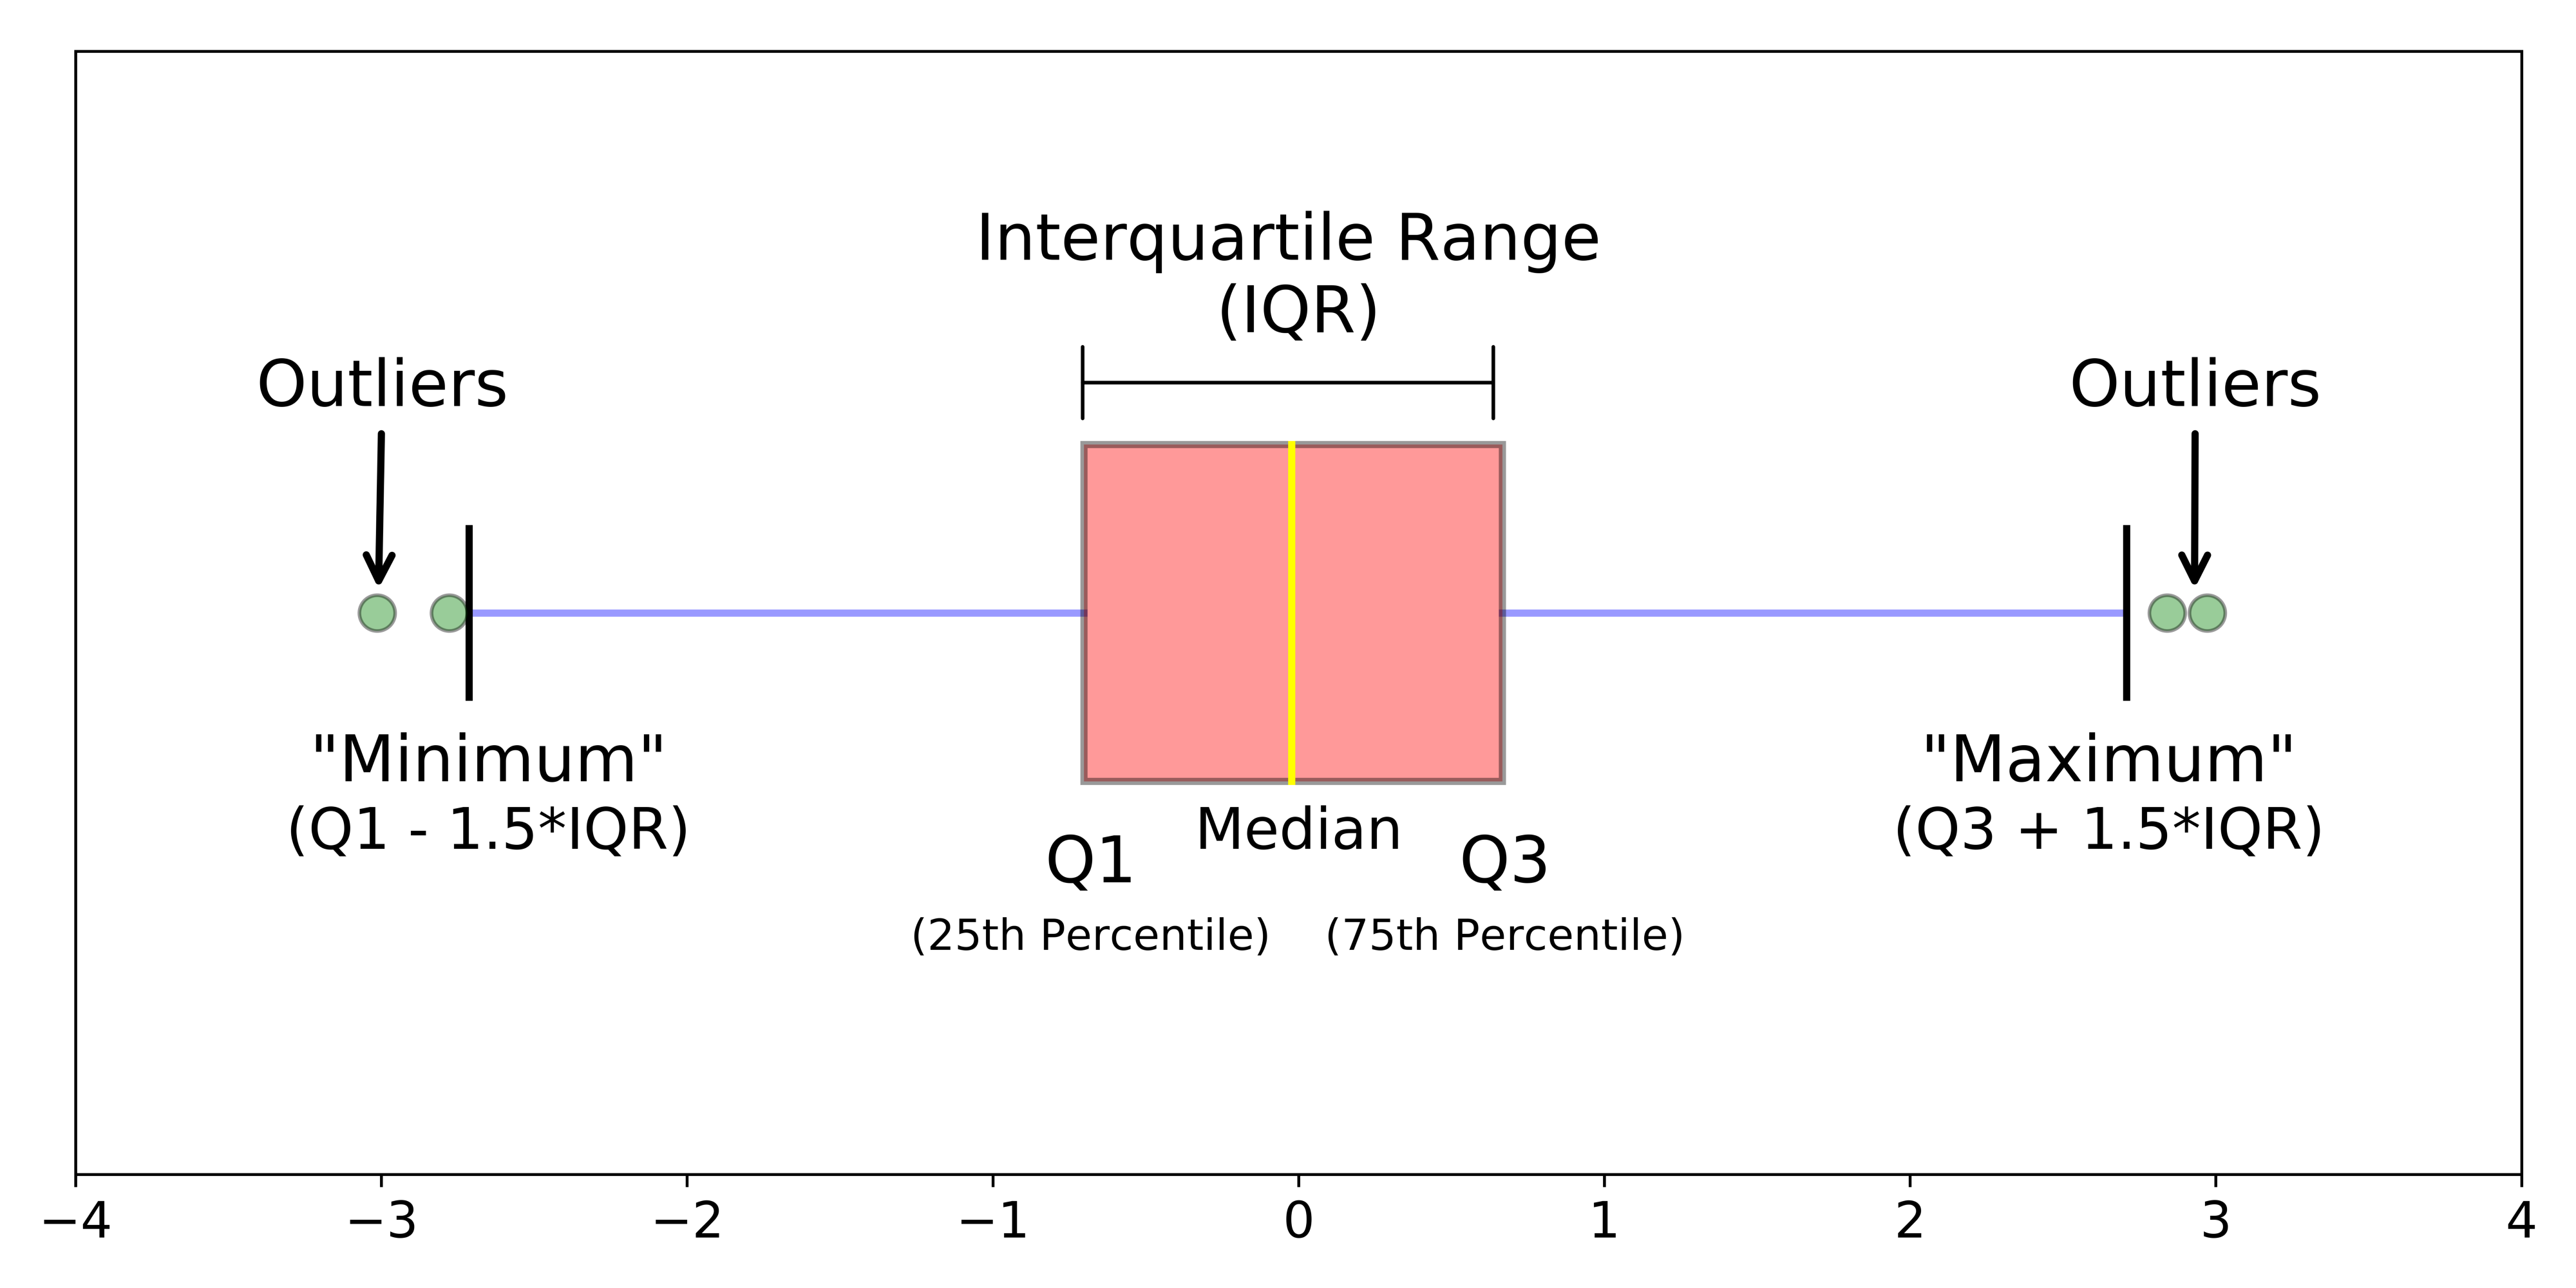

In [89]:
from IPython.display import Image
Image("/Users/rahulgarg/github/ThinkStats2/boxplot.png")

https://www.kdnuggets.com/2019/11/understanding-boxplots.html

# Box Plots

In [90]:
live.shape

(9148, 9)

In [91]:
live.head()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39


In [92]:
live.reset_index(drop = True, inplace = True)

In [93]:
live.prglngth.describe([0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.95])

count    9148.000000
mean       38.560560
std         2.702344
min         0.000000
5%         34.000000
10%        36.000000
20%        38.000000
30%        39.000000
40%        39.000000
50%        39.000000
60%        39.000000
70%        39.000000
80%        40.000000
90%        41.000000
95%        42.000000
max        50.000000
Name: prglngth, dtype: float64

In [94]:
live['flag'] = 'outliers_values'

<ipython-input-94-7862487c1336>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  live['flag'] = 'outliers_values'


In [95]:
live.loc[(live.prglngth>=34) & (live.prglngth<=42), 'flag'] = 'valid_values'

/Users/rahulgarg/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [96]:
live

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth,flag
0,1,1,1,1.0,8.0,13.0,33.16,2,39,valid_values
1,1,1,2,2.0,7.0,14.0,39.25,2,39,valid_values
2,2,1,1,1.0,9.0,2.0,14.33,3,39,valid_values
3,2,1,2,2.0,7.0,0.0,17.83,3,39,valid_values
4,2,1,3,3.0,6.0,3.0,18.33,3,39,valid_values
...,...,...,...,...,...,...,...,...,...,...
9143,12568,1,2,1.0,6.0,6.0,30.66,3,39,valid_values
9144,12569,1,2,1.0,6.0,6.0,26.91,2,34,valid_values
9145,12571,1,1,1.0,6.0,3.0,17.91,5,39,valid_values
9146,12571,1,4,2.0,7.0,8.0,21.58,5,39,valid_values


In [97]:
live.loc[live.flag == 'outliers_values']

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth,flag
13,15,1,2,1.0,7.0,11.0,28.33,3,33,outliers_values
14,15,1,3,2.0,7.0,8.0,30.33,3,33,outliers_values
98,149,1,1,1.0,6.0,2.0,16.91,3,43,outliers_values
99,149,1,2,2.0,9.0,5.0,17.83,3,43,outliers_values
106,150,1,6,6.0,6.0,8.0,23.50,6,9,outliers_values
...,...,...,...,...,...,...,...,...,...,...
9051,12427,1,3,2.0,10.0,2.0,20.83,3,44,outliers_values
9109,12518,1,1,1.0,6.0,15.0,30.25,1,33,outliers_values
9115,12535,1,2,2.0,2.0,13.0,25.50,3,30,outliers_values
9117,12539,1,1,1.0,4.0,2.0,18.50,4,30,outliers_values


In [98]:
live.flag.value_counts()

valid_values       8478
outliers_values     670
Name: flag, dtype: int64

In [99]:
live_wo_outliers = live.loc[(live.prglngth>=34) & (live.prglngth<=42)]

In [100]:
live_wo_outliers.reset_index(drop = True, inplace = True)

In [101]:
live_wo_outliers

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth,flag
0,1,1,1,1.0,8.0,13.0,33.16,2,39,valid_values
1,1,1,2,2.0,7.0,14.0,39.25,2,39,valid_values
2,2,1,1,1.0,9.0,2.0,14.33,3,39,valid_values
3,2,1,2,2.0,7.0,0.0,17.83,3,39,valid_values
4,2,1,3,3.0,6.0,3.0,18.33,3,39,valid_values
...,...,...,...,...,...,...,...,...,...,...
8473,12568,1,2,1.0,6.0,6.0,30.66,3,39,valid_values
8474,12569,1,2,1.0,6.0,6.0,26.91,2,34,valid_values
8475,12571,1,1,1.0,6.0,3.0,17.91,5,39,valid_values
8476,12571,1,4,2.0,7.0,8.0,21.58,5,39,valid_values


# Comparing the mean again

In [102]:
firsts = live_wo_outliers.loc[live_wo_outliers.birthord==1]
others = live_wo_outliers.loc[live_wo_outliers.birthord!=1]

In [103]:
firsts.prglngth.mean()

38.97188655980271

In [104]:
others.prglngth.mean()

38.85620619489035

In [105]:
firsts.prglngth.mean() - others.prglngth.mean()

0.11568036491236455

In [106]:
0.11568036491236455/39

0.0029661632028811424

<AxesSubplot:xlabel='prglngth', ylabel='Count'>

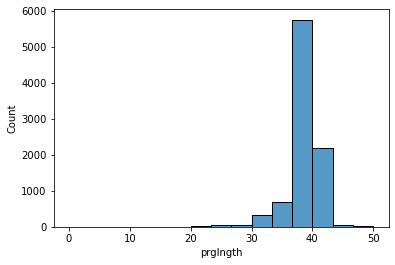

In [107]:
sns.histplot(live.prglngth)

/Users/rahulgarg/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prglngth'>

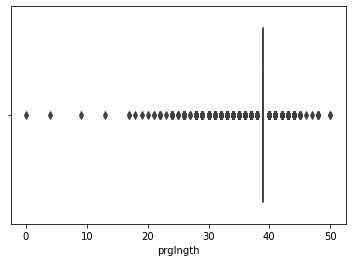

In [108]:
sns.boxplot(live.prglngth)

<AxesSubplot:xlabel='prglngth', ylabel='Count'>

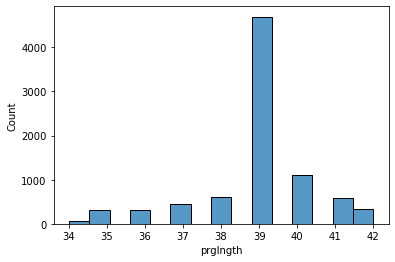

In [109]:
sns.histplot(live_wo_outliers.prglngth)

In [110]:
live_wo_outliers.prglngth.value_counts()

39    4693
40    1116
38     607
41     587
37     455
42     328
36     321
35     311
34      60
Name: prglngth, dtype: int64

<AxesSubplot:xlabel='prglngth', ylabel='Probability'>

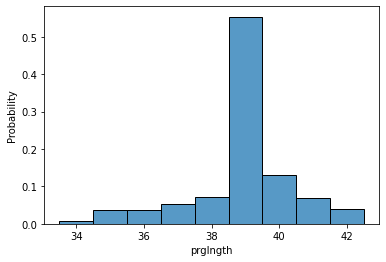

In [111]:
sns.histplot(live_wo_outliers.prglngth,discrete = True , stat = 'probability')

# Probability mass functions /Discrete probability distributions
### When we use a probability function to describe a discrete probability distribution we call it a probability mass function (commonly abbreviated as pmf).

https://towardsdatascience.com/probability-concepts-explained-probability-distributions-introduction-part-3-4a5db81858dc#:~:text=A%20probability%20distribution%20is%20a%20list%20of%20outcomes%20and%20their%20associated%20probabilities.&text=A%20function%20that%20represents%20a,called%20a%20probability%20density%20function.

To get from frequencies to probabilities, we divide through by n, which is called normalization.


# Random Variable (X)  -> prglngth

In [112]:
# We will use the firsts dataframe for further Analysis
firsts.shape

(4055, 10)

In [113]:
firsts.head()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth,flag
0,1,1,1,1.0,8.0,13.0,33.16,2,39,valid_values
2,2,1,1,1.0,9.0,2.0,14.33,3,39,valid_values
5,6,1,1,1.0,8.0,9.0,27.00,3,38,valid_values
8,7,1,1,1.0,7.0,9.0,28.08,2,39,valid_values
10,12,1,1,1.0,7.0,13.0,25.75,1,39,valid_values


<AxesSubplot:xlabel='agepreg', ylabel='Density'>

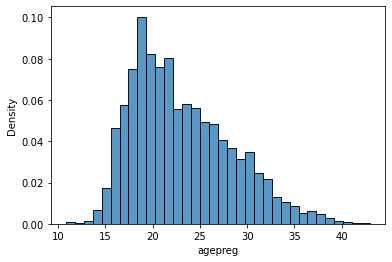

In [144]:
sns.histplot(firsts.agepreg, stat = 'density')

<AxesSubplot:xlabel='prglngth', ylabel='Count'>

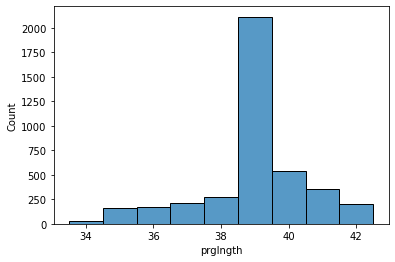

In [114]:
sns.histplot(firsts.prglngth, discrete = True)

In [115]:
firsts.prglngth.value_counts()

39    2114
40     536
41     360
38     272
37     208
42     205
36     172
35     159
34      29
Name: prglngth, dtype: int64

In [116]:
2114/4055

0.5213316892725031

In [117]:
firsts.prglngth.value_counts(normalize = True)

39    0.521332
40    0.132182
41    0.088779
38    0.067078
37    0.051295
42    0.050555
36    0.042417
35    0.039211
34    0.007152
Name: prglngth, dtype: float64

<AxesSubplot:xlabel='prglngth', ylabel='Probability'>

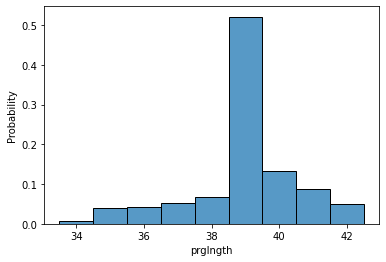

In [118]:
sns.histplot(firsts.prglngth, stat = 'probability', discrete = True)

39 - 52%
other week - 48%

# Question 
GIVEN
- P(Birth in 39th week) = 60%
- P(Birth in any other week) = 40%
- Question1 : In a hospital, if 3 new cases of firsts births arrive, What is the probability for **exactly two** births happening in week 39?
- Question2 : In a hospital, if 3 new cases of firsts births arrive, What is the probability for **at least two births** happening in week 39?
- Question3 : In a hospital, if 100 new cases of firsts births arrive, What is the probability for **exactly two** happening in week 39?


### Random Variable (X) is a way to map outcomes of random processes to a number e.g coin toss, rolling a dice, measuring anything.

X = Number Births happening in 39th week - Good else bad

In [120]:
X =[0, 1, 2 , 3]

In [127]:
X = range(0,100)

In [ ]:
100 c 2 * (0.6)^2 * (0.4)^98

In [129]:
pd.DataFrame(X)

,0
0,0
1,1
2,2
3,3
4,4
...,...
95,95
96,96
97,97
98,98


In [121]:
3C0 *0.4*0.4*0.4 + 3c1*0.6*0.4*0.4 + 3c2*0.6*0.6*0.4 + 3c3*0.6*0.6*0.6 = 1

SyntaxError: invalid syntax (<ipython-input-121-9575354cd986>, line 1)

In [122]:
lst = [1 *0.4*0.4*0.4, 3*0.6*0.4*0.4, 3*0.6*0.6*0.4,1*0.6*0.6*0.6]
lst

[0.06400000000000002, 0.288, 0.43199999999999994, 0.216]

In [141]:
from scipy.stats import binom

1.789727246793468e-36

In [501]:
k = np.arange(4)
k

array([0, 1, 2, 3])

In [504]:
binomial = binom.pmf(k, 3, 0.6)
binomial

array([0.064, 0.288, 0.432, 0.216])

P(X>=2) = 1-P(X<2) = 1-(p(X==0)+p(X==1)) = 1-(1*(0.4)**100) - 100*0.68*0.4**99

<AxesSubplot:>

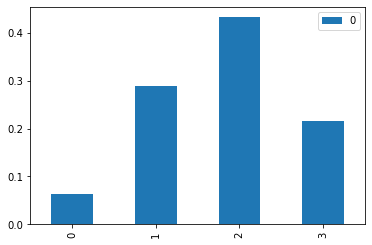

In [189]:
df.plot(kind = 'bar')

In [190]:
3 * 0.6 * 0.6 * 0.4

0.43199999999999994

3 C 2 = 3!/(1!) 2! = 3

Sample Space

GGG
GGB
GBG
GBB
BGG
BGB
BBG
BBB

In [191]:
0.6 * 0.6 * 0.4 * 3

0.43199999999999994

In [192]:
lst = ['GGG',
'GGB',
'GBG',
'GBB',
'BGG',
'BGB',
'BBG',
'BBB']

In [193]:
df = pd.DataFrame(lst, columns = ['sample_space'])

In [194]:
df['X'] = df.sample_space.str.count('G')
df

,sample_space,X
0,GGG,3
1,GGB,2
2,GBG,2
3,GBB,1
4,BGG,2
5,BGB,1
6,BBG,1
7,BBB,0


In [195]:
2**3

8

In [198]:
(0.6*0.6*0.6)*1 + (0.6 * 0.6 * 0.4) * 3

0.6479999999999999

In [199]:
2**100

1267650600228229401496703205376

# Question 2 - Coin

In [201]:
X = 'Number of Heads after 3 filps of a coin'

In [202]:
possible_outcomes = ['HHH', 'HHT', 'HTH', 'THH', 'HTT', 'THT', 'TTH', 'TTT']
possible_outcomes

['HHH', 'HHT', 'HTH', 'THH', 'HTT', 'THT', 'TTH', 'TTT']

In [203]:
coinsdf = pd.DataFrame(possible_outcomes, columns = ['sample_space'])

Biased coin = p(H) = 80%

In [206]:
coinsdf['X'] = coinsdf.sample_space.str.count('H')
coinsdf

,sample_space,X
0,HHH,3
1,HHT,2
2,HTH,2
3,THH,2
4,HTT,1
5,THT,1
6,TTH,1
7,TTT,0


In [207]:
coinsdf['probability'] = 0.125

In [208]:
coinsdf.loc[0, 'probability_baised'] = 0.8*0.8*0.8
coinsdf.loc[1, 'probability_baised'] = 0.8*0.8*0.2
coinsdf.loc[2, 'probability_baised'] = 0.8*0.8*0.2
coinsdf.loc[3, 'probability_baised'] = 0.8*0.8*0.2
coinsdf.loc[4, 'probability_baised'] = 0.8*0.2*0.2
coinsdf.loc[5, 'probability_baised'] = 0.8*0.2*0.2
coinsdf.loc[6, 'probability_baised'] = 0.8*0.2*0.2
coinsdf.loc[7, 'probability_baised'] = 0.2*0.2*0.2


In [209]:
coinsdf

,sample_space,X,probability,probability_baised
0,HHH,3,0.125,0.512
1,HHT,2,0.125,0.128
2,HTH,2,0.125,0.128
3,THH,2,0.125,0.128
4,HTT,1,0.125,0.032
5,THT,1,0.125,0.032
6,TTH,1,0.125,0.032
7,TTT,0,0.125,0.008


In a Biased coin - What is probability of getting exactly 2 head

In [210]:
pmf1 = coinsdf.groupby('X').agg({'probability_baised':sum})

<AxesSubplot:xlabel='X'>

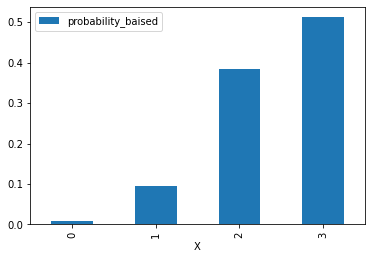

In [211]:
pmf1.plot(kind = 'bar')

In [212]:
pmf2 = coinsdf.groupby('X').agg({'probability':sum})

<AxesSubplot:xlabel='X'>

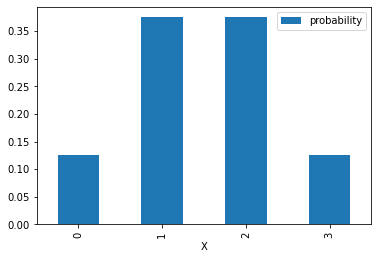

In [213]:
pmf2.plot(kind = 'bar')

In [214]:
coinsdf.probability_baised.sum()

1.0000000000000002

In [215]:
coinsdf.loc[0, 'probability_baised'] = 0.8*0.8*0.8
coinsdf.loc[1, 'probability_baised'] = 0.8*0.8*0.2
coinsdf.loc[2, 'probability_baised'] = 0.8*0.8*0.2
coinsdf.loc[3, 'probability_baised'] = 0.8*0.8*0.2
coinsdf.loc[4, 'probability_baised'] = 0.8*0.2*0.2
coinsdf.loc[5, 'probability_baised'] = 0.8*0.2*0.2
coinsdf.loc[6, 'probability_baised'] = 0.8*0.2*0.2
coinsdf.loc[7, 'probability_baised'] = 0.2*0.2*0.2

In [216]:
coinsdf.X.value_counts(normalize = True)

2    0.375
1    0.375
3    0.125
0    0.125
Name: X, dtype: float64

<AxesSubplot:xlabel='X', ylabel='Probability'>

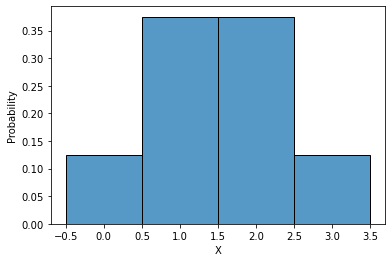

In [217]:
sns.histplot(coinsdf.X, discrete = True, stat = 'probability')

# Question 3

In a manufacturing unit,three parts from the assembly are selected. You are observing wheather they are defective or non-defective.
Determine - 
A) The Sample Space
B) The event of getting at least two defective parts

# 24th April
# Expected Value of a Random Variable

In [218]:
df2 =firsts.prglngth.value_counts(normalize = True).reset_index()
df2

,index,prglngth
0,39,0.521332
1,40,0.132182
2,41,0.088779
3,38,0.067078
4,37,0.051295
5,42,0.050555
6,36,0.042417
7,35,0.039211
8,34,0.007152


In [219]:
firsts.prglngth.mean()

38.97188655980271

In [220]:
df2['index'] *df2.prglngth

0    20.331936
1     5.287300
2     3.639951
3     2.548952
4     1.897904
5     2.123305
6     1.527004
7     1.372380
8     0.243157
dtype: float64

In [221]:
sum(df2['index'] *df2.prglngth)

38.97188655980271

In [222]:
df

,sample_space,X
0,GGG,3
1,GGB,2
2,GBG,2
3,GBB,1
4,BGG,2
5,BGB,1
6,BBG,1
7,BBB,0


X = having birth in 39 week

E(X) = mean(X)

https://brilliant.org/wiki/discrete-random-variables-probability-density/

https://brilliant.org/practice/discrete-random-variables-problem-solving/?subtopic=random-variables&chapter=discrete-random-variables&p=1

https://brilliant.org/practice/binomial-distribution/?subtopic=random-variables&chapter=discrete-probability-distributions

# 27th April, 2021

### What problem are we trying to solve here- we want to reach a conclusions about my future cases, based on my old cases. How to do this? What mathematical logic allows me to say something about the future based on the past?

### How do I get an idea of the distribution that applies to everyone based on only sample sitting in front of us?

In [288]:
firsts.reset_index(drop = True)

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth,flag
0,1,1,1,1.0,8.0,13.0,33.16,2,39,valid_values
1,2,1,1,1.0,9.0,2.0,14.33,3,39,valid_values
2,6,1,1,1.0,8.0,9.0,27.00,3,38,valid_values
3,7,1,1,1.0,7.0,9.0,28.08,2,39,valid_values
4,12,1,1,1.0,7.0,13.0,25.75,1,39,valid_values
...,...,...,...,...,...,...,...,...,...,...
4050,12565,1,1,1.0,6.0,7.0,31.66,2,39,valid_values
4051,12566,1,1,1.0,6.0,0.0,24.00,2,39,valid_values
4052,12568,1,2,1.0,6.0,6.0,30.66,3,39,valid_values
4053,12569,1,2,1.0,6.0,6.0,26.91,2,34,valid_values


In [ ]:
what is the avg age of mother in which first birth happen?

In [287]:
firsts.agepreg.mean()

23.063371146733598

In [ ]:
sample mean

# Sample and Population

### Mean Deviation, Absolute Deviation and Standard Deviation

https://www.mathsisfun.com/data/mean-deviation.html

https://www.mathsisfun.com/data/standard-deviation.html

# Population and Sample

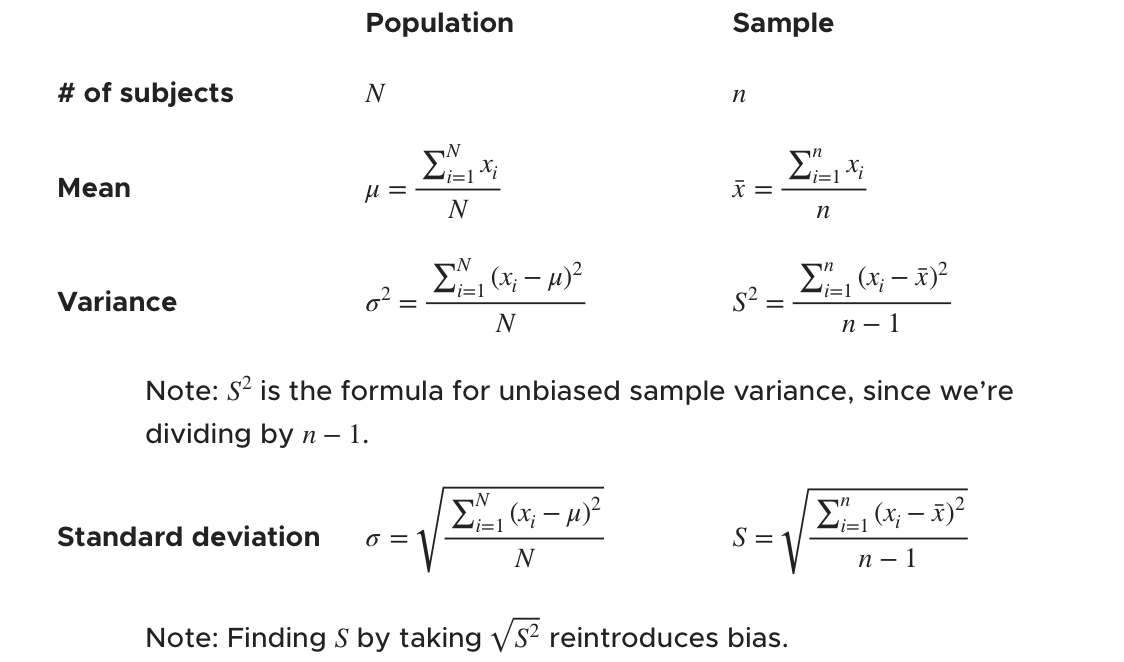

In [223]:
from IPython.display import Image
Image("/Users/rahulgarg/github/ThinkStats2/summary+table+of+mean,+variance,+and+standard+deviation+formulas.png")

# Understanding Variance and Standard Deviation on Pregnancy length

Variance is a summary statistic intended to describe the variability or spread of a distribution. 
The square root of variance, S, is the standard deviation.

Here's are the mean pregnancy lengths for first babies and others:

In [289]:
live.shape

(9148, 10)

In [290]:
live.describe()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
count,9148.000000,9148.0,9148.000000,9148.000000,9084.000000,9039.000000,9148.000000,9148.000000,9148.000000
mean,6176.405444,1.0,2.275251,1.825645,6.832122,6.917801,24.940751,3.477809,38.560560
std,3655.926584,0.0,1.443628,1.040395,1.411447,4.602523,5.567399,1.853568,2.702344
min,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,10.830000,1.000000,0.000000
25%,2965.750000,1.0,1.000000,1.000000,6.000000,3.000000,20.500000,2.000000,39.000000
50%,6060.000000,1.0,2.000000,2.000000,7.000000,7.000000,24.330000,3.000000,39.000000
75%,9388.250000,1.0,3.000000,2.000000,8.000000,11.000000,28.910000,4.000000,39.000000
max,12571.000000,1.0,17.000000,10.000000,15.000000,15.000000,44.080000,19.000000,50.000000


In [301]:
firsts.head()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth,flag,mean,diff,diff_squared
0,1,1,1,1.0,8.0,13.0,33.16,2,39,valid_values,38.971887,0.028113,0.000790
2,2,1,1,1.0,9.0,2.0,14.33,3,39,valid_values,38.971887,0.028113,0.000790
5,6,1,1,1.0,8.0,9.0,27.00,3,38,valid_values,38.971887,-0.971887,0.944563
8,7,1,1,1.0,7.0,9.0,28.08,2,39,valid_values,38.971887,0.028113,0.000790
10,12,1,1,1.0,7.0,13.0,25.75,1,39,valid_values,38.971887,0.028113,0.000790


In [306]:
firsts.shape

(4055, 13)

In [310]:
firsts.diff_squared.sum()/4054

2.4022681469702785

In [308]:
firsts.diff_squared.mean()

2.4016757257256924

In [309]:
firsts.prglngth.var()

2.402268146970321

In [314]:
np.sqrt(firsts.prglngth.var())

1.5499252068955847

In [294]:
firsts.mean()

caseid         6252.394575
outcome           1.000000
pregordr          1.320099
birthord          1.000000
birthwgt_lb       6.888392
birthwgt_oz       7.170452
agepreg          23.063371
pregnum           2.849075
prglngth         38.971887
dtype: float64

In [295]:
firsts['mean'] = firsts.prglngth.mean()

<ipython-input-295-d1f929c0a153>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firsts['mean'] = firsts.prglngth.mean()


In [298]:
firsts['diff'] = firsts.prglngth - firsts['mean']

<ipython-input-298-89bcdf7c736f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firsts['diff'] = firsts.prglngth - firsts['mean']


In [300]:
firsts['diff_squared'] = firsts['diff']**2

<ipython-input-300-277d339ce611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firsts['diff_squared'] = firsts['diff']**2


In [292]:
mean = firsts.prglngth.mean()
var = firsts.prglngth.var()
std = firsts.prglngth.std()
print('mean:', mean)
print('variance:', var)
print('std:', std)

mean: 38.97188655980271
variance: 2.402268146970321
std: 1.5499252068955847


**For all first births, the mean pregnancy length is 38.6 weeks, the standard deviation is 2.7 weeks, which means we should expect deviations of 2-3 weeks to be common.
Variance of pregnancy length is 7.3, which is hard to interpret, especially since the units are weeks2, or “square weeks.” Variance is useful in some calculations, but it is not a good summary statistic.**

In [ ]:
live.agepreg.value_counts(normalize = True)

In [ ]:
sns.histplot(live.agepreg, stat = 'density')

In [316]:
firsts.prglngth.std(ddof = 1)

1.5499252068955847

In [318]:
firsts.reset_index(drop = True, inplace = True)

In [319]:
firsts

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth,flag,mean,diff,diff_squared
0,1,1,1,1.0,8.0,13.0,33.16,2,39,valid_values,38.971887,0.028113,0.000790
1,2,1,1,1.0,9.0,2.0,14.33,3,39,valid_values,38.971887,0.028113,0.000790
2,6,1,1,1.0,8.0,9.0,27.00,3,38,valid_values,38.971887,-0.971887,0.944563
3,7,1,1,1.0,7.0,9.0,28.08,2,39,valid_values,38.971887,0.028113,0.000790
4,12,1,1,1.0,7.0,13.0,25.75,1,39,valid_values,38.971887,0.028113,0.000790
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050,12565,1,1,1.0,6.0,7.0,31.66,2,39,valid_values,38.971887,0.028113,0.000790
4051,12566,1,1,1.0,6.0,0.0,24.00,2,39,valid_values,38.971887,0.028113,0.000790
4052,12568,1,2,1.0,6.0,6.0,30.66,3,39,valid_values,38.971887,0.028113,0.000790
4053,12569,1,2,1.0,6.0,6.0,26.91,2,34,valid_values,38.971887,-4.971887,24.719656


# 28th Apr

take 10 samples for 50 datapoints each at random from population of 4055 and check for std using N and N-1 both. We want to identigy which count is giving closer result to the population mean


In [330]:
pwd

'/Users/rahulgarg/github/ThinkStats2/code'

In [331]:
firsts.to_csv('../datasets/preg_data_firsts.csv')

In [325]:
firsts.agepreg.std(ddof =0)

5.255358160949451

In [428]:
lst = []
for i in range(10000):
    lst.append(firsts.sample(100).agepreg.std(ddof = 0))

<AxesSubplot:ylabel='Count'>

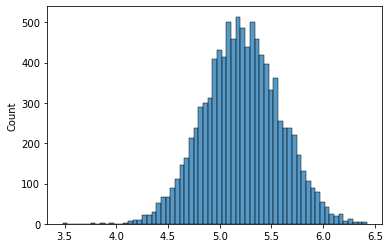

In [430]:
sns.histplot(lst)

In [431]:
sum(lst)/len(lst)

5.21569974967771

In [432]:
lst = []
for i in range(10000):
    lst.append(firsts.sample(100).agepreg.std(ddof = 1))

<AxesSubplot:ylabel='Count'>

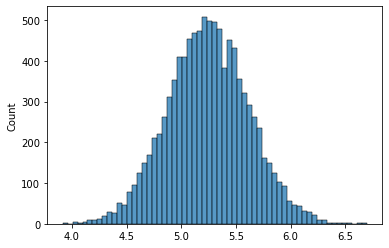

In [433]:
sns.histplot(lst)

In [434]:
sum(lst)/len(lst)

5.246261487965091

In [424]:
lst = []
for i in range(10000):
    lst.append(firsts.sample(100).agepreg.mean())

In [427]:
firsts.sample(100)

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth,flag,mean,diff,diff_squared
2566,8000,1,1,1.0,7.0,8.0,29.25,3,41,valid_values,38.971887,2.028113,4.113244
3605,11172,1,1,1.0,7.0,6.0,22.08,1,39,valid_values,38.971887,0.028113,0.000790
753,2219,1,1,1.0,6.0,0.0,33.91,1,36,valid_values,38.971887,-2.971887,8.832110
1435,4338,1,1,1.0,6.0,2.0,15.91,3,39,valid_values,38.971887,0.028113,0.000790
1661,5099,1,1,1.0,9.0,6.0,20.16,2,39,valid_values,38.971887,0.028113,0.000790
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,9779,1,2,1.0,6.0,5.0,21.58,3,39,valid_values,38.971887,0.028113,0.000790
86,284,1,1,1.0,7.0,8.0,14.08,5,39,valid_values,38.971887,0.028113,0.000790
3078,9558,1,1,1.0,7.0,7.0,18.66,2,39,valid_values,38.971887,0.028113,0.000790
1272,3836,1,1,1.0,7.0,12.0,20.50,1,39,valid_values,38.971887,0.028113,0.000790


<AxesSubplot:ylabel='Count'>

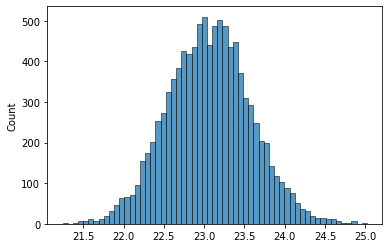

In [425]:
sns.histplot(lst)

In [426]:
firsts.agepreg.mean()

23.063371146733598

In [329]:
firsts.sample(50).agepreg.std(ddof = 1)

4.383893903267054

In [333]:
pwd

'/Users/rahulgarg/github/ThinkStats2/code'

In [339]:
new_data = pd.read_csv('/Users/rahulgarg/github/ThinkStats2/datasets/preg_data_firsts.csv', index_col = 0)

In [340]:
new_data

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth,flag,mean,diff,diff_squared
0,1,1,1,1.0,8.0,13.0,33.16,2,39,valid_values,38.971887,0.028113,0.000790
1,2,1,1,1.0,9.0,2.0,14.33,3,39,valid_values,38.971887,0.028113,0.000790
2,6,1,1,1.0,8.0,9.0,27.00,3,38,valid_values,38.971887,-0.971887,0.944563
3,7,1,1,1.0,7.0,9.0,28.08,2,39,valid_values,38.971887,0.028113,0.000790
4,12,1,1,1.0,7.0,13.0,25.75,1,39,valid_values,38.971887,0.028113,0.000790
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050,12565,1,1,1.0,6.0,7.0,31.66,2,39,valid_values,38.971887,0.028113,0.000790
4051,12566,1,1,1.0,6.0,0.0,24.00,2,39,valid_values,38.971887,0.028113,0.000790
4052,12568,1,2,1.0,6.0,6.0,30.66,3,39,valid_values,38.971887,0.028113,0.000790
4053,12569,1,2,1.0,6.0,6.0,26.91,2,34,valid_values,38.971887,-4.971887,24.719656


# README

Statistics - We need tp Problem first and then ask for data. Question is cheap and the Data is expensive. You are paid for collecting the data.

Machine Learning - Data is available which leads to solution to any given problem. Data is cheap and the question is expensive. You are paid for asking the right question.

3 key areas 
1. Descriptive - that says, describe for me where and when I am losing my sales
2. Predective - that says, what would happend if I change anything. ex price
3. Prescriptive - that says, what to do?
___
Descriptive Statistics - Trying to Understand Certain things about data that helps me to build the distribution

1. Univariate
    - 5 point summary
    - standard deviation, IQR
    - Probablity, Random variables, Discrete Probability Distribution
    - Central Limit Theorem

2. Bi-variate
    - covariance - sense of variability of two variables togeather, Its univariate version is Variance.
    - correlation - scaled version of covariance
    
3. Multi-variate
    - linear regression
    - plots - scatter plot/pair plot

In [ ]:
bmi = wt/ht2
wt = bmi* ht2

# Bivariate Analysis

# COVARIANCE


In [435]:
firsts.head()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth,flag,mean,diff,diff_squared
0,1,1,1,1.0,8.0,13.0,33.16,2,39,valid_values,38.971887,0.028113,0.000790
1,2,1,1,1.0,9.0,2.0,14.33,3,39,valid_values,38.971887,0.028113,0.000790
2,6,1,1,1.0,8.0,9.0,27.00,3,38,valid_values,38.971887,-0.971887,0.944563
3,7,1,1,1.0,7.0,9.0,28.08,2,39,valid_values,38.971887,0.028113,0.000790
4,12,1,1,1.0,7.0,13.0,25.75,1,39,valid_values,38.971887,0.028113,0.000790


In [436]:
firsts.birthwgt_lb.var()

1.4840596456006805

In [437]:
firsts.agepreg.var()

27.625602125412975

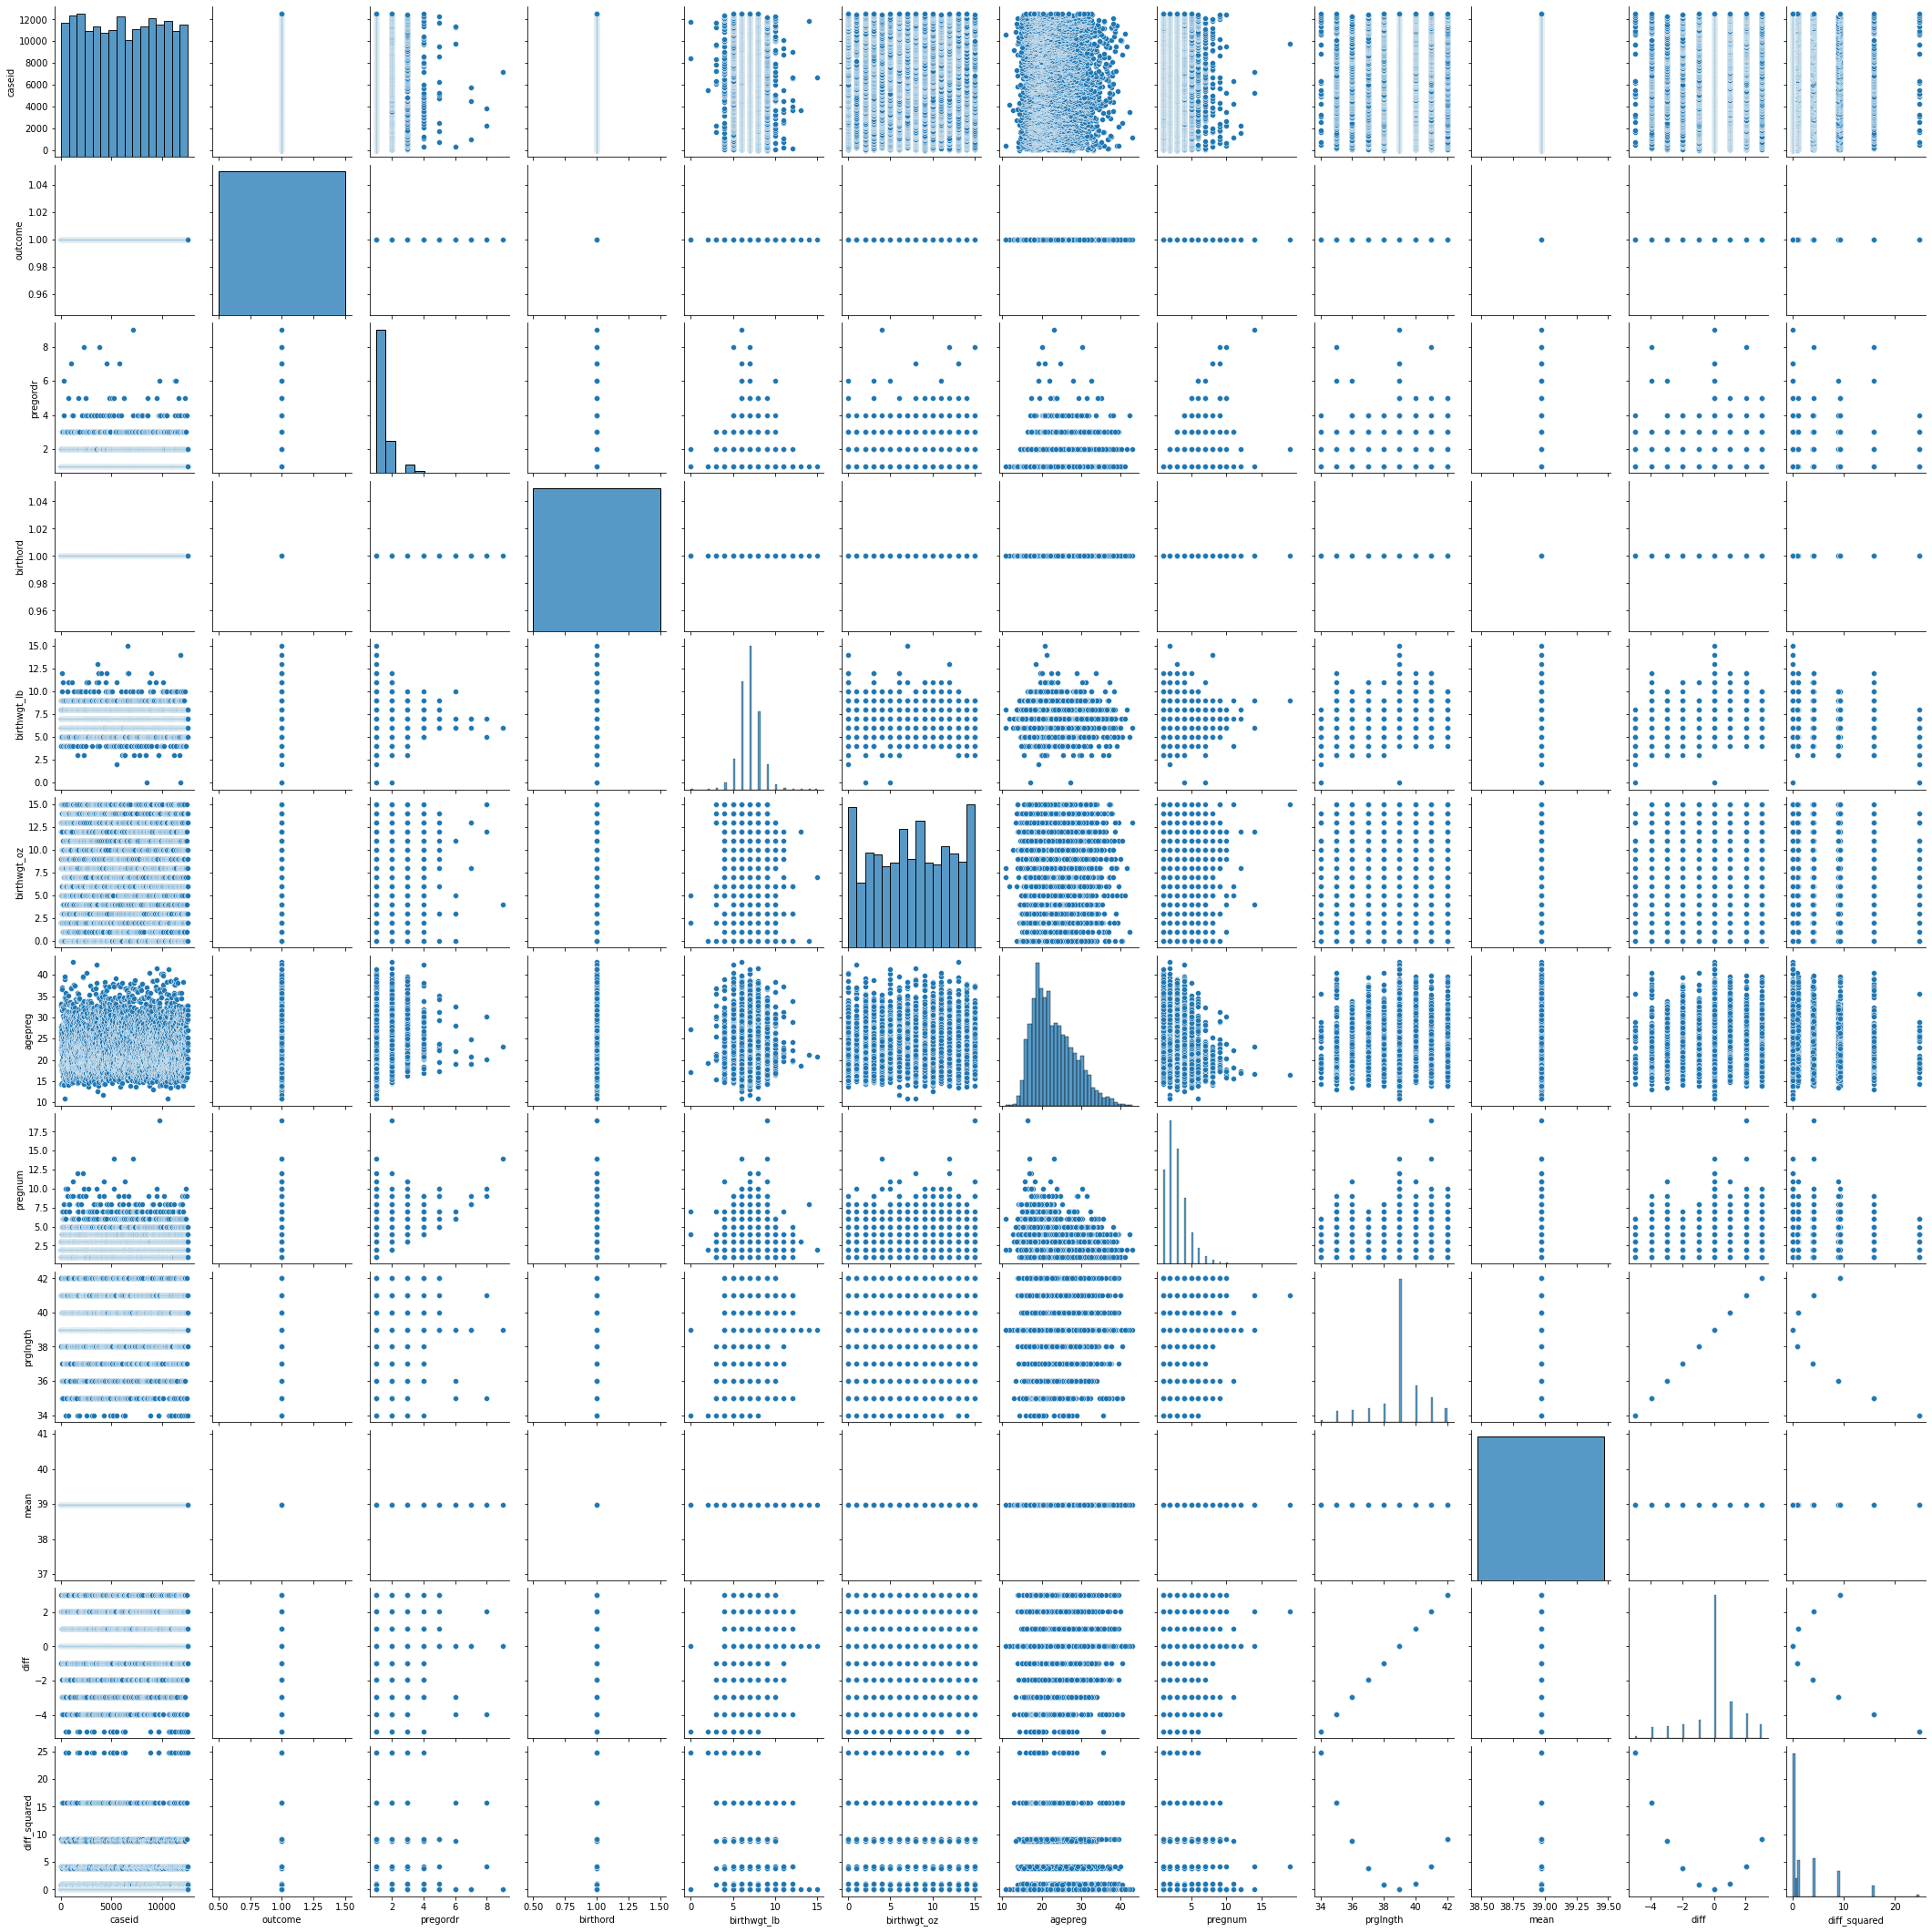

In [494]:
sns.pairplot(firsts)

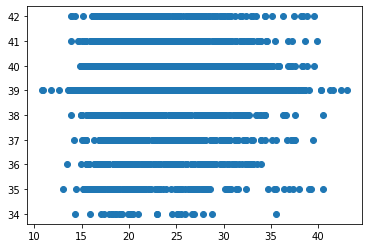

In [492]:
plt.scatter(firsts.agepreg, firsts.prglngth)

In [511]:
df = firsts.loc[:,['agepreg','birthwgt_lb']]
df

,agepreg,birthwgt_lb
0,33.16,8.0
1,14.33,9.0
2,27.00,8.0
3,28.08,7.0
4,25.75,7.0
...,...,...
4050,31.66,6.0
4051,24.00,6.0
4052,30.66,6.0
4053,26.91,6.0


In [512]:
df['agepreg_days'] = df.agepreg*365

In [513]:
df.mean()

agepreg           23.063371
birthwgt_lb        6.888392
agepreg_days    8418.130469
dtype: float64

In [514]:
df.cov()

,agepreg,birthwgt_lb,agepreg_days
agepreg,27.625602,0.378061,1.008334e+04
birthwgt_lb,0.378061,1.484060,1.379922e+02
agepreg_days,10083.344776,137.992200,3.680421e+06


In [515]:
df.corr()

,agepreg,birthwgt_lb,agepreg_days
agepreg,1.000000,0.058996,1.000000
birthwgt_lb,0.058996,1.000000,0.058996
agepreg_days,1.000000,0.058996,1.000000


In [516]:
df['agepreg_diff'] = df['agepreg'] - 23.063371
df['birthwgt_lb_diff'] = df['birthwgt_lb'] -6.888392

In [517]:
df['agepreg_days_diff'] = df['agepreg_days'] - 8418
df['birthwgt_lb_diff'] = df['birthwgt_lb'] -6.888392

In [526]:
df['cov'] = df.agepreg_diff*df.birthwgt_lb_diff
df['sigma1'] = df.agepreg_diff*df.agepreg_diff
df['sigma2'] = df.birthwgt_lb_diff*df.birthwgt_lb_diff

In [527]:
df

,agepreg,birthwgt_lb,agepreg_days,agepreg_diff,birthwgt_lb_diff,agepreg_days_diff,cov,sigma1,sigma2
0,33.16,8.0,12103.40,10.096629,1.111608,3685.40,11.223494,101.941917,1.235672
1,14.33,9.0,5230.45,-8.733371,2.111608,-3187.55,-18.441456,76.271769,4.458888
2,27.00,8.0,9855.00,3.936629,1.111608,1437.00,4.375988,15.497048,1.235672
3,28.08,7.0,10249.20,5.016629,0.111608,1831.20,0.559896,25.166567,0.012456
4,25.75,7.0,9398.75,2.686629,0.111608,980.75,0.299849,7.217975,0.012456
...,...,...,...,...,...,...,...,...,...
4050,31.66,6.0,11555.90,8.596629,-0.888392,3137.90,-7.637176,73.902030,0.789240
4051,24.00,6.0,8760.00,0.936629,-0.888392,342.00,-0.832094,0.877274,0.789240
4052,30.66,6.0,11190.90,7.596629,-0.888392,2772.90,-6.748784,57.708772,0.789240
4053,26.91,6.0,9822.15,3.846629,-0.888392,1404.15,-3.417314,14.796555,0.789240


In [528]:
df.sum()

agepreg              9.352197e+04
birthwgt_lb          2.771200e+04
agepreg_days         3.413552e+07
agepreg_diff         5.950000e-04
birthwgt_lb_diff    -1.016000e-03
agepreg_days_diff    5.290500e+02
cov                  1.520561e+03
sigma1               1.119942e+05
sigma2               5.968888e+03
dtype: float64

In [529]:
df['cov'].sum()

1520.5606155049359

In [530]:
df.sigma1.sum()

111994.19101642424

In [531]:
df.sigma2.sum()

5968.887894606271

In [536]:
np.sqrt(df.sigma1.sum()*df.sigma2.sum())

25854.995088457414

In [534]:
corr = df['cov'].sum()/np.sqrt(df.sigma1.sum()*df.sigma2.sum())
corr

0.05881109666827081

In [535]:
df.corr()

,agepreg,birthwgt_lb,agepreg_days,agepreg_diff,birthwgt_lb_diff,agepreg_days_diff,cov,sigma1,sigma2
agepreg,1.000000,0.058996,1.000000,1.000000,0.058996,1.000000,-0.018859,0.497293,0.012597
birthwgt_lb,0.058996,1.000000,0.058996,0.058996,1.000000,0.058996,0.026079,-0.013557,0.123452
agepreg_days,1.000000,0.058996,1.000000,1.000000,0.058996,1.000000,-0.018859,0.497293,0.012597
agepreg_diff,1.000000,0.058996,1.000000,1.000000,0.058996,1.000000,-0.018859,0.497293,0.012597
birthwgt_lb_diff,0.058996,1.000000,0.058996,0.058996,1.000000,0.058996,0.026079,-0.013557,0.123452
agepreg_days_diff,1.000000,0.058996,1.000000,1.000000,0.058996,1.000000,-0.018859,0.497293,0.012597
cov,-0.018859,0.026079,-0.018859,-0.018859,0.026079,-0.018859,1.000000,-0.021583,0.009153
sigma1,0.497293,-0.013557,0.497293,0.497293,-0.013557,0.497293,-0.021583,1.000000,0.011884
sigma2,0.012597,0.123452,0.012597,0.012597,0.123452,0.012597,0.009153,0.011884,1.000000


In [479]:
df['multi'] = df.agepreg_days_diff*df.birthwgt_lb_diff

In [480]:
df.multi.sum()/4054

136.90296608949185

In [462]:
df.cov()

,agepreg,birthwgt_lb,agepreg_diff,birthwgt_lb_diff,multi,agepreg_days,agepreg_days_diff
agepreg,27.625602,0.378061,27.625602,0.378061,-2.354378e+02,1.008334e+04,1.008334e+04
birthwgt_lb,0.378061,1.484060,0.378061,1.484060,7.560767e+01,1.379922e+02,1.379922e+02
agepreg_diff,27.625602,0.378061,27.625602,0.378061,-2.354378e+02,1.008334e+04,1.008334e+04
birthwgt_lb_diff,0.378061,1.484060,0.378061,1.484060,7.560767e+01,1.379922e+02,1.379922e+02
multi,-235.437832,75.607672,-235.437832,75.607672,5.634756e+06,-8.593481e+04,-8.593481e+04
agepreg_days,10083.344776,137.992200,10083.344776,137.992200,-8.593481e+04,3.680421e+06,3.680421e+06
agepreg_days_diff,10083.344776,137.992200,10083.344776,137.992200,-8.593481e+04,3.680421e+06,3.680421e+06


In [481]:
df.corr()

,agepreg,birthwgt_lb,agepreg_days,multi,agepreg_diff,birthwgt_lb_diff,agepreg_days_diff
agepreg,1.000000,0.058996,1.000000,-0.018855,1.000000,0.058996,1.000000
birthwgt_lb,0.058996,1.000000,0.058996,0.026146,0.058996,1.000000,0.058996
agepreg_days,1.000000,0.058996,1.000000,-0.018855,1.000000,0.058996,1.000000
multi,-0.018855,0.026146,-0.018855,1.000000,-0.018855,0.026146,-0.018855
agepreg_diff,1.000000,0.058996,1.000000,-0.018855,1.000000,0.058996,1.000000
birthwgt_lb_diff,0.058996,1.000000,0.058996,0.026146,0.058996,1.000000,0.058996
agepreg_days_diff,1.000000,0.058996,1.000000,-0.018855,1.000000,0.058996,1.000000


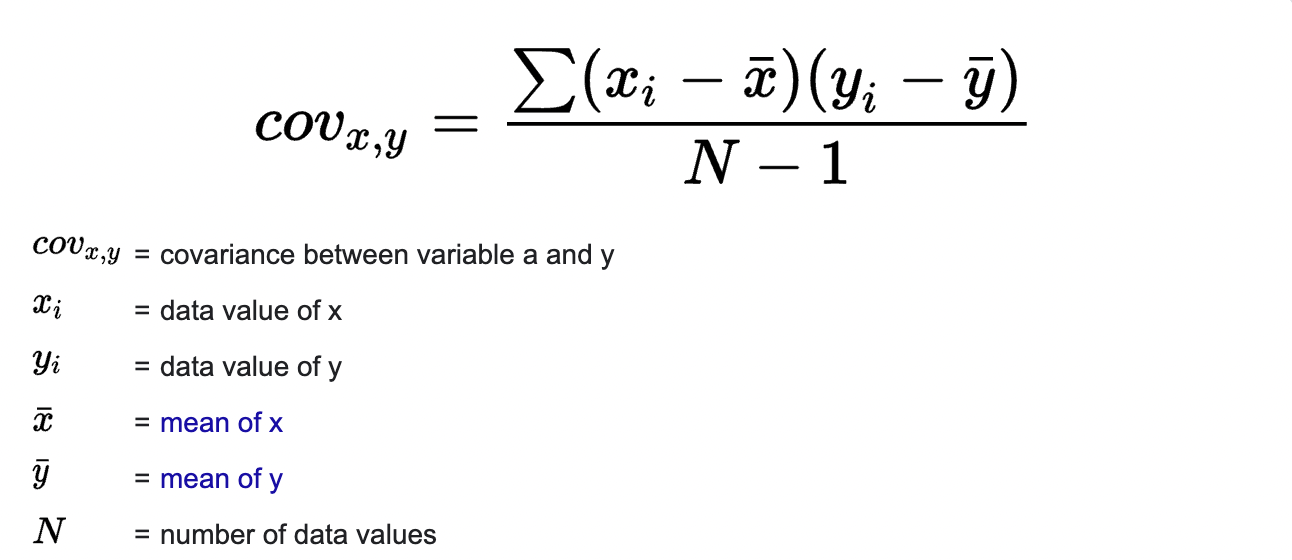

In [231]:
Image("/Users/rahulgarg/Documents/Screenshot 2021-04-26 at 4.06.52 PM.png")

what is xi - xbar, yi-ybar, when is this term positive?

both positive, or both -ve
case 2- one -ve and one +ve

Used in Dimension reduction, Principal Component

What is the covariance of X and X

covariance is a measure of the nature of relationship between x and y, if +ve they are moving in the same direction, if -ve they are moving in the opposite direction, if 0 - there is no relation.

# Correlation

When we look at distribution of two variables, there is little bit more to it. There is a relationship between the two variables that We would want to capture. 

How do I measure wheather one variable is related to another variable or not? 
Please note that we are trying to find a number - like a mean, like a sd, i.e if the number is this correlation is high or low.

There are many ways in which we can define such number, below one is the most accepted and used one.

Its a symmetrics concept, there is not comment about causation here.

there is useful summary particular for large data

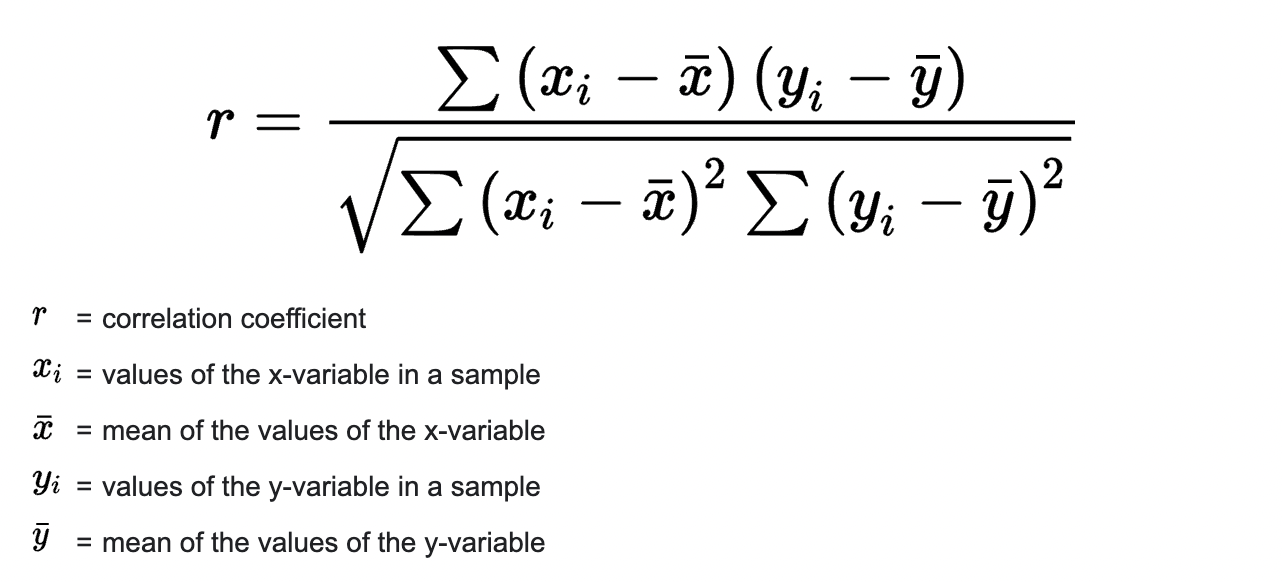

In [227]:
Image("/Users/rahulgarg/Documents/Screenshot 2021-04-26 at 3.59.52 PM.png")

In [234]:
corr = firsts.corr()
corr

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
caseid,1.000000,NaN,0.001877,NaN,-0.007767,-0.014518,0.007613,-0.018727,0.001495
outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pregordr,0.001877,NaN,1.000000,NaN,-0.015547,0.053621,0.197598,0.391707,0.004005
birthord,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthwgt_lb,-0.007767,NaN,-0.015547,NaN,1.000000,-0.153186,0.058996,-0.025858,0.300785
birthwgt_oz,-0.014518,NaN,0.053621,NaN,-0.153186,1.000000,0.027589,0.014539,0.017946
agepreg,0.007613,NaN,0.197598,NaN,0.058996,0.027589,1.000000,-0.208682,0.020394
pregnum,-0.018727,NaN,0.391707,NaN,-0.025858,0.014539,-0.208682,1.000000,0.003648
prglngth,0.001495,NaN,0.004005,NaN,0.300785,0.017946,0.020394,0.003648,1.000000


<AxesSubplot:>

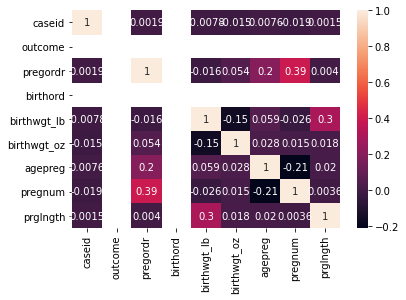

In [235]:
sns.heatmap(corr, annot = True)

# Simple linear Regression

In [496]:
# dataset - The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
# The sales are in thousands of units and the budget is in thousands of dollars.
df =pd.read_csv('/Users/rahulgarg/github/ThinkStats2/datasets/Advertising.csv', index_col = 0)

In [497]:
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [498]:
df.Sales.mean()

14.022500000000003

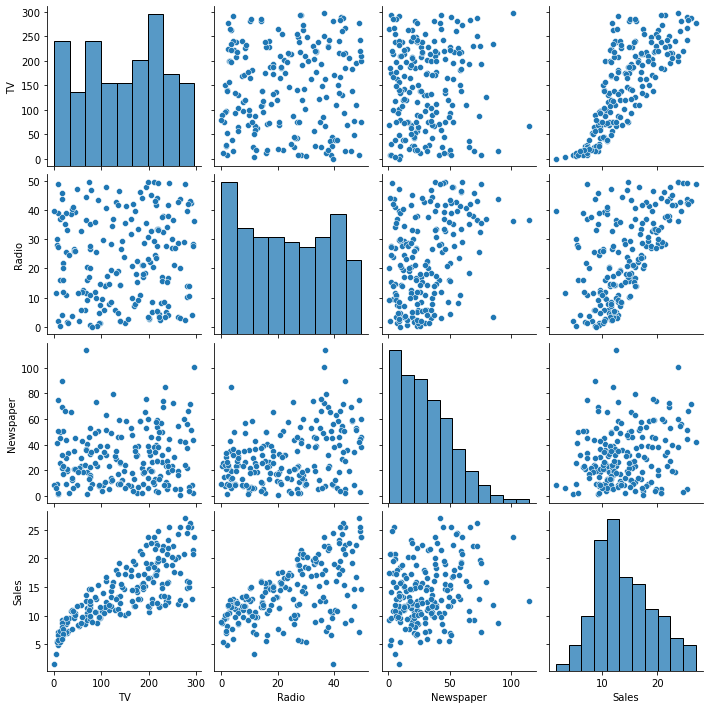

In [273]:
sns.pairplot(df)

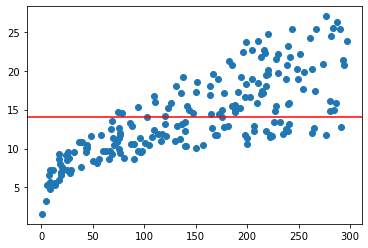

In [383]:
plt.scatter(df.TV, advert.Sales)
plt.axhline(df.Sales.mean(), color = 'r')

In [283]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
y = mx+c. We need a criteria to find m and c. we will find a line and find out how good it is to describe the data.

In [ ]:
m = beta, c = alphaa

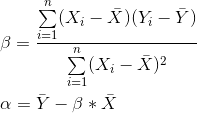

In [378]:
Image('/Users/rahulgarg/github/ThinkStats2/0_gR-W7RFar9ijxwAa.gif')

m = covariance/ variance

the line passes through the Xbar and Y bar

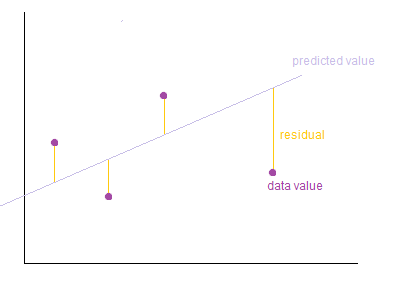

In [377]:
Image('/Users/rahulgarg/github/ThinkStats2/1_6lzTBeDt_J39XPvhI4NAMg.png')

In [274]:
# Load
from sklearn.linear_model import LinearRegression

In [345]:
# Instantiate
reg = LinearRegression()

In [347]:
# Using only TV
X = df.loc[:,['TV']]
y = df.Sales
reg.fit(X,y)

LinearRegression()

In [348]:
reg.coef_

array([0.04753664])

In [349]:
reg.intercept_

7.0325935491276965

In [350]:
# Sales = 7.03 + 0.047*TV

### Lets try to build this equation manually

In [380]:
df.Sales.mean()

14.022500000000003

In [381]:
df.Sales.std()

5.217456565710477

In [382]:
df.Sales.var()

27.221853015075364

In [384]:
df.cov()

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,350.390195
Radio,69.862492,220.427743,114.496979,44.635688
Newspaper,105.919452,114.496979,474.308326,25.941392
Sales,350.390195,44.635688,25.941392,27.221853


In [387]:
df.TV.var()

7370.949893216087

In [386]:
m = 350.390195/7370.949893
m

0.04753664047190939

In [388]:
df.TV.mean()

147.0425

In [390]:
c = 14.022500000000003 - m* 147.0425
c

7.032593543409266

# Least Squares Method

In [353]:
# Import and display first five rows of advertising dataset
advert = pd.read_csv('/Users/rahulgarg/github/ThinkStats2/datasets/Advertising.csv', index_col = 0)
advert.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [354]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Sales ~ TV', data=advert)
model = model.fit()

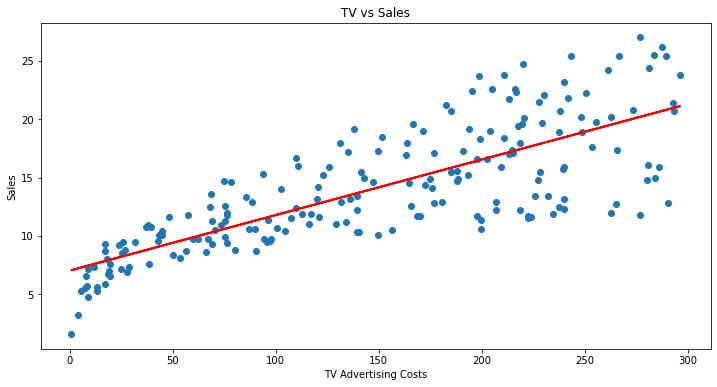

In [365]:
# Predict values
sales_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.scatter(advert['TV'], advert['Sales'])           # scatter plot showing actual data
plt.plot(advert['TV'], sales_pred, 'r', linewidth=2)   # regression line
plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.show()

# Linear Regression Using All 3 Variables

In [341]:
X = df.loc[:,['TV','Radio','Newspaper']]

In [277]:
y = df.Sales

In [278]:
# Fit
reg.fit(X,y)

LinearRegression()

In [279]:
reg.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [280]:
reg.intercept_

2.9388893694594085

In [285]:
# sales = 2.93 + 0.04*TV + 0.18*Radio - 0.00* Newspaper

In [284]:
reg.predict(np.array([[100, 100,0]]))

array([26.36835561])

This is the first model. Descriptive to Predictive.

If I give you 3 variable, How do you describe the relationship between them?